<a href="https://colab.research.google.com/github/honeydewsago/IndividualProject_Admin/blob/main/VGG16Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/herb_images/train'
val_dir = '/content/drive/MyDrive/herb_images/val'
test_dir = '/content/drive/MyDrive/herb_images/test'

In [4]:
import os

print("Files in train directory:")
print(os.listdir(train_dir))

print("Files in validation directory:")
print(os.listdir(val_dir))

print("Files in test directory:")
print(os.listdir(test_dir))

Files in train directory:
['aiye', 'fuling', 'dangshen', 'baihe', 'chongcao', 'huangqi', 'gouqi', 'gancao', 'huangbai', 'heshouwu', 'luohanguo', 'tiannanxing', 'jinyinhua', 'renshen', 'shanyao']
Files in validation directory:
['huangqi', 'gouqi', 'gancao', 'huangbai', 'aiye', 'heshouwu', 'dangshen', 'chongcao', 'fuling', 'baihe', 'luohanguo', 'renshen', 'tiannanxing', 'shanyao', 'jinyinhua']
Files in test directory:
['heshouwu', 'gouqi', 'chongcao', 'huangbai', 'fuling', 'dangshen', 'baihe', 'aiye', 'huangqi', 'gancao', 'jinyinhua', 'renshen', 'shanyao', 'tiannanxing', 'luohanguo']


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with preprocessing and augmentation options
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,            # Normalize pixel values
    rotation_range=20,            # Random rotation up to 20 degrees
    width_shift_range=0.2,        # Random horizontal shift
    height_shift_range=0.2,       # Random vertical shift
    shear_range=0.2,              # Shear transformations
    zoom_range=0.2,               # Random zoom-in or zoom-out
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest',          # Fill mode for pixel values outside the boundaries
    brightness_range=[0.7, 1.3],  # Random image brightness adjustment
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create data generators
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

Found 3000 images belonging to 15 classes.
Found 375 images belonging to 15 classes.
Found 375 images belonging to 15 classes.


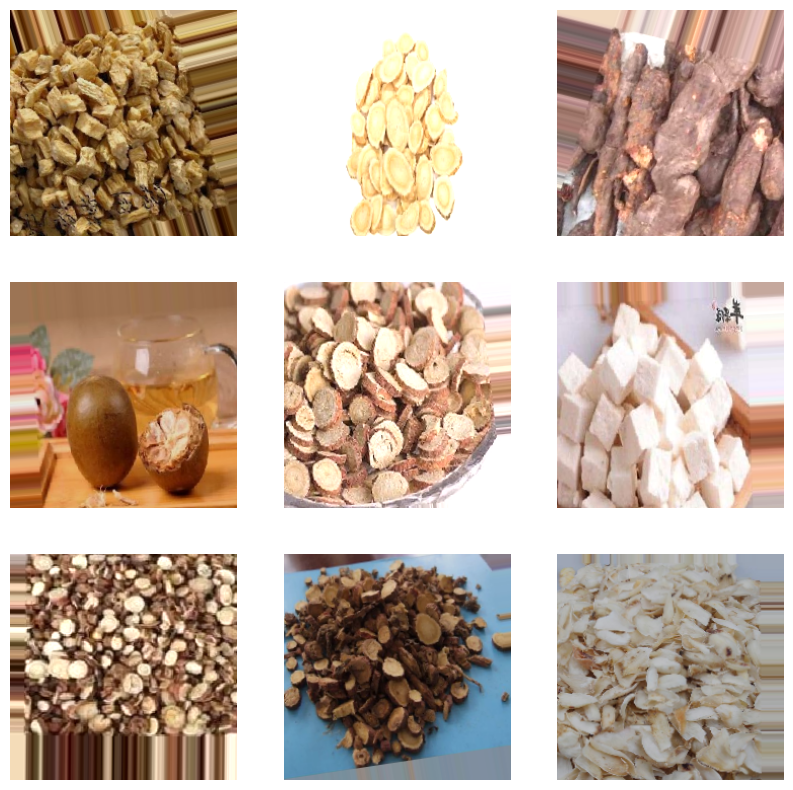

In [27]:
# Visualize preprocessed images
import matplotlib.pyplot as plt

sample_images, _ = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()

Found 3000 images belonging to 15 classes.


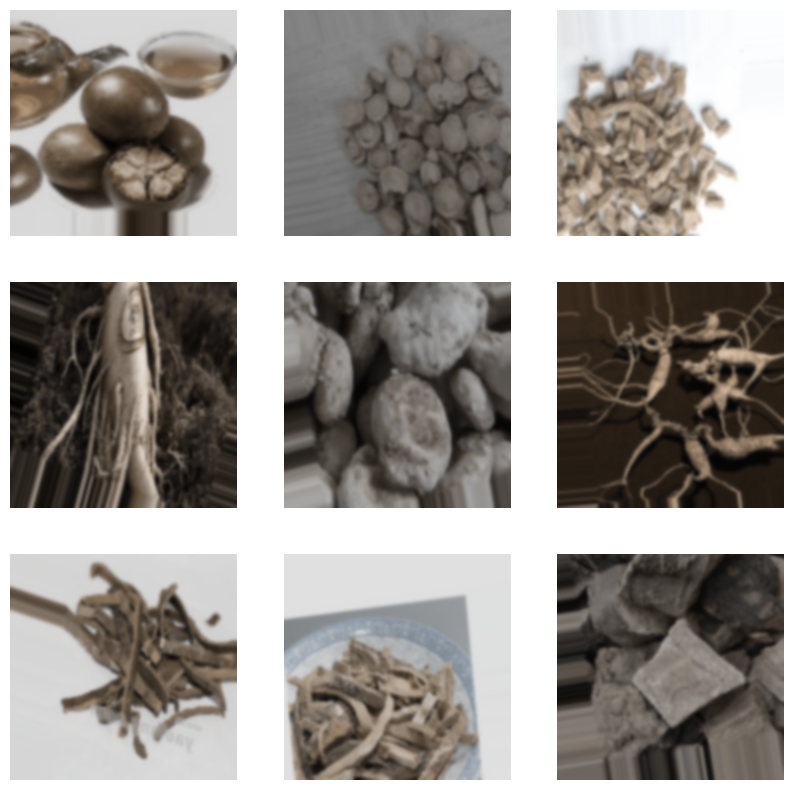

In [19]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Adding Gaussian Filter
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,            # Normalize pixel values
    rotation_range=20,            # Random rotation up to 20 degrees
    width_shift_range=0.2,        # Random horizontal shift
    height_shift_range=0.2,       # Random vertical shift
    shear_range=0.2,              # Shear transformations
    zoom_range=0.2,               # Random zoom-in or zoom-out
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest',          # Fill mode for pixel values outside the boundaries
    brightness_range=[0.7, 1.3],  # Random image brightness adjustment
    preprocessing_function=lambda x: apply_gaussian_filter(x),
)

# Define a function to apply Gaussian filtering
def apply_gaussian_filter(image):
    sigma = 1.5
    return ndimage.gaussian_filter(image, sigma=sigma)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'
)

# Visualize preprocessed images
sample_images, _ = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()

Found 3000 images belonging to 15 classes.


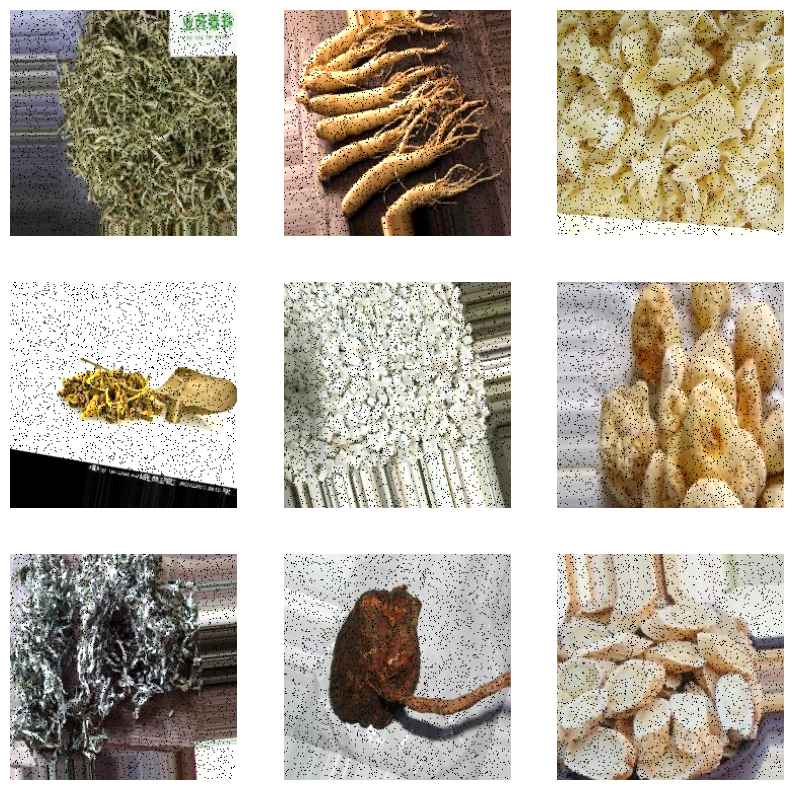

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Adding salt and pepper noise filter
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,            # Normalize pixel values
    rotation_range=20,            # Random rotation up to 20 degrees
    width_shift_range=0.2,        # Random horizontal shift
    height_shift_range=0.2,       # Random vertical shift
    shear_range=0.2,              # Shear transformations
    zoom_range=0.2,               # Random zoom-in or zoom-out
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest',          # Fill mode for pixel values outside the boundaries
    brightness_range=[0.7, 1.3],  # Random image brightness adjustment
    preprocessing_function=lambda x: apply_salt_pepper_noise(x),
)

# Define a function to apply Salt & Pepper noise
def apply_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy_image = np.copy(image)
    total_pixels = image.size

    num_salt = np.ceil(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1], :] = 1

    num_pepper = np.ceil(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1], :] = 0

    return noisy_image

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'
)

# Visualize preprocessed images
sample_images, _ = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()

Found 3000 images belonging to 15 classes.


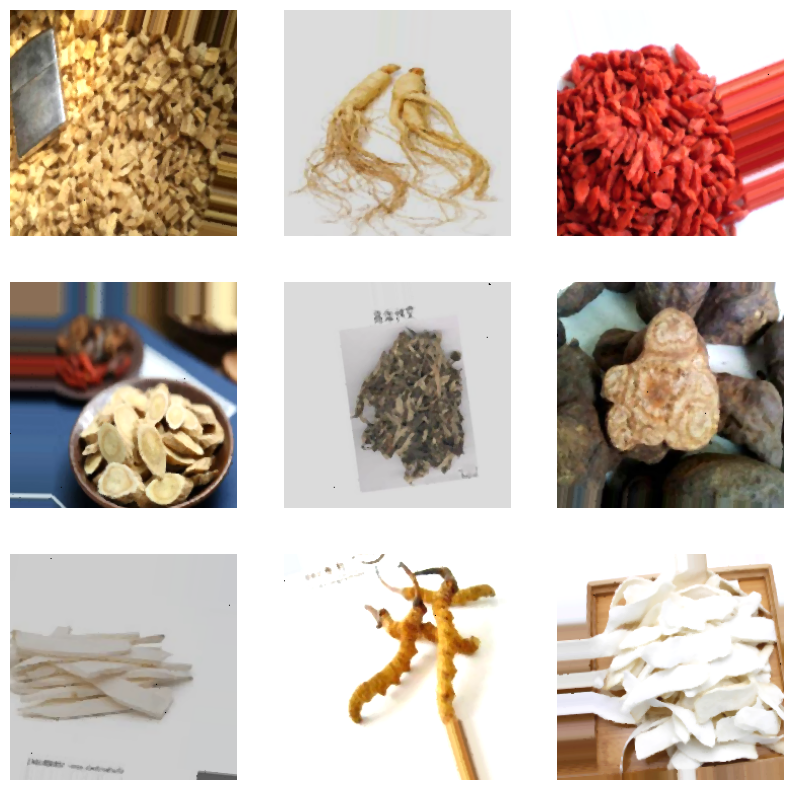

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Adding median filter with salt and pepper noise filter
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,            # Normalize pixel values
    rotation_range=20,            # Random rotation up to 20 degrees
    width_shift_range=0.2,        # Random horizontal shift
    height_shift_range=0.2,       # Random vertical shift
    shear_range=0.2,              # Shear transformations
    zoom_range=0.2,               # Random zoom-in or zoom-out
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest',          # Fill mode for pixel values outside the boundaries
    brightness_range=[0.7, 1.3],  # Random image brightness adjustment
    preprocessing_function=lambda x: apply_median_filter(apply_salt_pepper_noise(x)),  # Apply median filter after salt and pepper noise
)

# Create a function to apply the median filter
def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

# Define a function to apply Salt & Pepper noise
def apply_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy_image = np.copy(image)
    total_pixels = image.size

    num_salt = np.ceil(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1], :] = 1

    num_pepper = np.ceil(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1], :] = 0

    return noisy_image

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'
)

# Visualize preprocessed images
sample_images, _ = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()